In [2]:
import pandas as pd

import datetime
import requests
import io
import time

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#load historical adjusted close prices for each index
adjclose=pd.read_csv("adjclose.csv")
adjclose.head()

,S&P 500,Dow 30,Nasdaq,NYSE COMPOSITE (DJ),NYSE AMEX COMPOSITE INDEX,Cboe UK 100 Price Return,Russell 2000,Vix,FTSE 100,DAX PERFORMANCE-INDEX,...,KOSPI Composite Index,TSEC weighted index,S&P/TSX Composite index,IBOVESPA,IPC MEXICO,S&P/CLX IPSA,MERVAL,TA-125,EGX 30 Price Return Index,Top 40 USD Net TRI Index
0,93.000000,NaN,NaN,550.890015,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93.459999,NaN,NaN,553.640015,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,92.820000,NaN,NaN,549.830017,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,92.629997,NaN,NaN,548.989990,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92.680000,NaN,NaN,549.409973,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#calculate returns
pct_change = adjclose.pct_change()
profit = pct_change.rolling(252).mean() #using one year rolling average
profit.sort_values()

TypeError: sort_values() missing 1 required positional argument: 'by'

In [11]:
#calculate risk
risk = pct_change.std()
risk.sort_values()

S&P/NZX 50 INDEX GROSS       0.005904
Cboe UK 100 Price Return     0.008145
S&P/ASX 200                  0.008433
S&P/CLX IPSA                 0.008587
ALL ORDINARIES               0.008698
S&P/TSX Composite index      0.008710
NYSE AMEX COMPOSITE INDEX    0.009421
NYSE COMPOSITE (DJ)          0.009452
S&P 500                      0.009783
FTSE 100                     0.009845
Dow 30                       0.009911
MOEX Russia Index            0.009968
BEL 20                       0.010177
STI Index                    0.010723
TA-125                       0.011120
FTSE Bursa Malaysia KLCI     0.011337
Nasdaq                       0.011381
Russell 2000                 0.011629
EURONEXT 100                 0.011724
ESTX 50 PR.EUR               0.011882
Nikkei 225                   0.011918
CAC 40                       0.012307
TSEC weighted index          0.012321
DAX PERFORMANCE-INDEX        0.012612
IPC MEXICO                   0.013035
S&P BSE SENSEX               0.013242
Jakarta Comp

In [19]:
#calculate sharpe ratio for each index
sharpe = profit / risk * (252 ** 0.5)


Nikkei 225

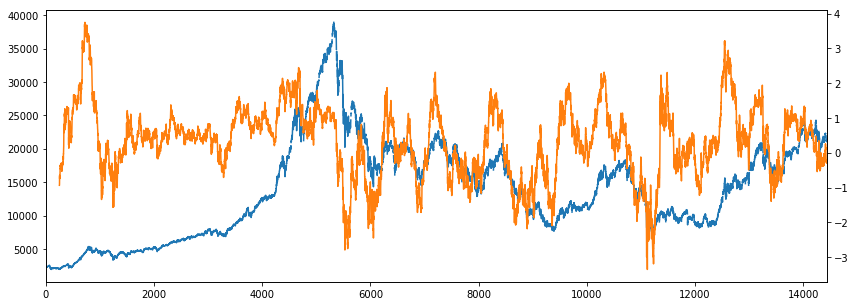

In [33]:
fig = plt.figure(figsize=(14, 5))
adjclose['Nikkei 225'].plot()
sharpe['Nikkei 225'].plot(secondary_y=True)


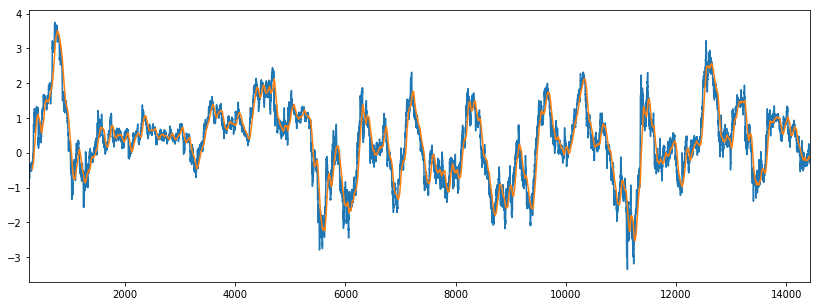

In [31]:
#smooth sharpe trend over the long run
fig = plt.figure(figsize=(14, 5))
sr = sharpe['Nikkei 225'].dropna()

d = 60
srsma = sr.rolling(d).mean() #rolling average every 60 days
sr.plot()
srsma.plot()